# Table of Contents

1. [Introduction](#introduction)
2. [Notebook settings](#notebook-settings)
3. [Dependencies](#dependencies)
4. [Data Load, Cleaning and Validation](#data-load-cleaning-and-validation) 
5. [Main Dataframe Setup](#main-dataframe-setup)
6. [Gender Group Analysis](#gender-group-analysis)
7. [Age feature and Age group analysis](#age-feature-and-age-group-analysis)
8. [Age Group Distribution by Gender](#age-group-distribution-by-gender)
9. [Geographical Analysis](#geographical-analysis)
10. [Check Most Frequent Questions](#check-most-frequent-questions)
    1. [Question id 5 Analysis: Are you self-employed?](#question-id-5-analysis:-are-you-self-employed?)
    2. [Question id 10 Analysis: Does your employer provide mental health benefits as part of healthcare coverage?](#question-id-10-analysis:-does-your-employer-provide-mental-health-benefits-as-part-of-healthcare-coverage?)
    3. [Question id 7 Analysis: Have you ever sought treatment for a mental health disorder from a mental health professional?](#question-id-7-analysis:-have-you-ever-sought-treatment-for-a-mental-health-disorder-from-a-mental-health-professional?)
11. [Sample Size Analysis](#sample-size-analysis)
12. [Sampling Analysis for Gender over the top 5 countries respondents](#sampling-analysis-for-gender-over-the-top-5-countries-respondents)
13. [Sampling Bias Conclusion](#sampling-bias-conclusion)
14. [Prevalence Rate analysis](#prevalence-rate-analysis)
15. [Correlation Analysis for the mapped questions](#correlation-analysis-for-the-mapped-questions)
16. [Conclusion](#conclusion)
17. [Suggestions About How Your Analysis Can Be Improved](#suggestions-about-how-your-analysis-can-be-improved)

# Introduction
The tech industry often gets portrayed as a paradise where everything is perfect—think butterflies fluttering and flowers blooming constantly. It's imagined as a realm where 'geeks' and 'nerds' effortlessly turn data into meaningful insights with just a few keystrokes.

But this rosy picture is far from reality. The tech world moves at lightning speed, with people expecting answers before they've even figured out the questions. Clients demand complete software solutions even before they know exactly what they want.

This fast-paced environment brings significant pressure to deliver top-notch, ready-to-use products. With the rise of and environment like that, tech workers are now under more stress than ever to perform and meet tight deadlines.

We will analyze the Survey on Mental Health in the Tech Workplace in 2014, 2016, 2017, 2018, 2019.

Data Source: https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry/code


# Notebook settings


In [1]:
from assets.utils.functions import *

In [2]:
%load_ext pycodestyle_magic
#%reload_ext pycodestyle_magic
%pycodestyle_on
%flake8_on
%flake8_on --max_line_length 79
%matplotlib inline

# Dependencies


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load, Cleaning and Validation


In [4]:
connect_to_db(sqlite_path)

Connected to the SQLite database


In [5]:
info(conn)

Table: Answer
Number of rows: 236898
Number of columns: 4
Columns:
- AnswerText (VARCHAR(10000))
- SurveyID (INTEGER)
- UserID (INTEGER)
- QuestionID (INTEGER)

Table: Question
Number of rows: 105
Number of columns: 2
Columns:
- questiontext (VARCHAR(1000))
- questionid (INTEGER)

Table: Survey
Number of rows: 5
Number of columns: 2
Columns:
- SurveyID (INTEGER)
- Description (VARCHAR(255))



## Checking for Nan records


In [6]:
check_nan_values(sqlite_path, table_schema)

Number of NaN values in Answer:
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64
Number of NaN values in Question:
questiontext    0
questionid      0
dtype: int64
Number of NaN values in Survey:
SurveyID       0
Description    0
dtype: int64


## Handling Missing Values


In [7]:
check_missing_values(conn)

Number of missing values in column AnswerText of the Answer table: 0
Number of missing values in column SurveyID of the Answer table: 0
Number of missing values in column UserID of the Answer table: 0
Number of missing values in column QuestionID of the Answer table: 0
Number of missing values in column questiontext of the Question table: 0
Number of missing values in column questionid of the Question table: 0
Number of missing values in column SurveyID of the Survey table: 0
Number of missing values in column Description of the Survey table: 0


As we can see, the dataset has no missing values. However, we will check for duplicates and other inconsistencies.


## Handling Duplicate and Inconsistent Values


In [8]:
check_duplicates(sqlite_path, table_schema)

Number of duplicate rows in Answer: 0
Number of duplicate rows in Question: 0
Number of duplicate rows in Survey: 0


Even though the tables do not have any duplicate values, I decided to check each table to ensure that there are no further inconsistencies.


In [9]:
# Check Survey table
query = ("SELECT * FROM Survey ")
survey = pd.read_sql_query(query, conn)
print(survey)

   SurveyID                    Description
0      2014  mental health survey for 2014
1      2016  mental health survey for 2016
2      2017  mental health survey for 2017
3      2018  mental health survey for 2018
4      2019  mental health survey for 2019


As shown above the `Survey` table has data for 2014, 2016, 2017, 2018 and 2019.


In [10]:
# Check Answer table
query = ("SELECT * FROM Answer ")
answer = pd.read_sql_query(query, conn)
print(answer)

                AnswerText  SurveyID  UserID  QuestionID
0                       37      2014       1           1
1                       44      2014       2           1
2                       32      2014       3           1
3                       31      2014       4           1
4                       31      2014       5           1
...                    ...       ...     ...         ...
236893               Other      2016    2689         117
236894             Support      2016    2690         117
236895  Back-end Developer      2016    2691         117
236896     DevOps/SysAdmin      2016    2692         117
236897               Other      2016    2693         117

[236898 rows x 4 columns]


Nothing that appear to be relevant as data inconsistency was found in the `Answer` table.


In [11]:
# Check Question table
query = ("SELECT * FROM Question ")
result = pd.read_sql_query(query, conn)
print(result)

                                          questiontext  questionid
0                                    What is your age?           1
1                                 What is your gender?           2
2                         What country do you live in?           3
3    If you live in the United States, which state ...           4
4                               Are you self-employed?           5
..                                                 ...         ...
100  Do you think that team members/co-workers woul...         114
101  If yes, what condition(s) have you been diagno...         115
102  If maybe, what condition(s) do you believe you...         116
103  Which of the following best describes your wor...         117
104                              Do you work remotely?         118

[105 rows x 2 columns]


For the `Question` table, there is a mismatch between the number of rows (105) and the `questionid` column (118). <br/>
This indicates that there are mismatches in the `questionid` column. So, it is necessary to check this issue.<br/>
The query will be used to find gaps in the sequence of `questionid` values.<br/>

The result is a list of gaps in the `questionid` sequence, with the start and end of each gap.


In [12]:
query_check_qid = ("SELECT q1.questionid + 1 AS start_of_gap, "
                   "(SELECT MIN(q2.questionid) - 1 "
                   "FROM Question q2 "
                   "WHERE q2.questionid > q1.questionid) AS end_of_gap "
                   "FROM Question q1 "
                   "WHERE NOT EXISTS (SELECT 1 "
                   "FROM Question q2 "
                   "WHERE q2.questionid = q1.questionid + 1)")
gaps = pd.read_sql_query(query_check_qid, conn)
print(gaps)

   start_of_gap  end_of_gap
0            35        47.0
1           119         NaN


The results show there is a gap between the question 34 and 48. So this explains the mismatch between the number of rows and the `questionid` column.<br/> The gap is 13. It means there are 13 missing values in the `questionid` column. Which relates to 118 `questionid` values and 105 rows in the `Question` table.<br/>To check if the `questiontext` has equivalent values of `questionid` values, (already confirmed as 105)we can use the following query:


In [13]:
query = ("SELECT COUNT(DISTINCT questiontext) as num_questions "
         "FROM Question ")
result = pd.read_sql_query(query, conn)
print(result)

   num_questions
0            105


It matches. There are 105 unique questions that are equal to the number of rows in this table. <br/>So the conclusion is that the `questionid` column has 13 missing values (ids) and the table has 105 unique questions.


# Main Dataframe Setup


In [14]:
query_merge_all = """
SELECT a.*, q.questionid, q.questiontext
FROM Answer a
INNER JOIN Question q ON a.QuestionID = q.questionid
INNER JOIN Survey s ON a.SurveyID = s.SurveyID
"""
main_df = pd.read_sql_query(
    query_merge_all, conn, index_col='UserID'
).sort_index()
main_df = main_df[['SurveyID', 'questionid', 'questiontext', 'AnswerText']]
main_df = main_df.rename(columns={
    'SurveyID': 'surveyid',
    'AnswerText': 'answertext'
})
main_df

,surveyid,questionid,questiontext,answertext
UserID,,,,
1,2014,1,What is your age?,37
1,2014,101,Would you bring up a physical health issue wit...,Maybe
1,2014,100,Would you be willing to discuss a mental healt...,Yes
1,2014,99,Would you be willing to discuss a mental healt...,Some of them
1,2014,98,Do you think that discussing a mental health i...,No
...,...,...,...,...
4218,2019,29,Would you be willing to bring up a physical he...,Maybe
4218,2019,13,Is your primary role within your company relat...,1
4218,2019,12,Would you bring up a mental health issue with ...,Yes


Checking one survey response to understand the data structure.

In [15]:
main_df[main_df.index == 1]

,surveyid,questionid,questiontext,answertext
UserID,,,,
1,2014,1,What is your age?,37
1,2014,101,Would you bring up a physical health issue wit...,Maybe
1,2014,100,Would you be willing to discuss a mental healt...,Yes
1,2014,99,Would you be willing to discuss a mental healt...,Some of them
1,2014,98,Do you think that discussing a mental health i...,No
1,2014,97,How easy is it for you to take medical leave f...,Somewhat easy
1,2014,96,Does your employer provide resources to learn ...,Yes
1,2014,95,Has your employer ever discussed mental health...,No
1,2014,94,Do you know the options for mental health care...,Not sure


In [16]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236898 entries, 1 to 4218
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   surveyid      236898 non-null  int64 
 1   questionid    236898 non-null  int64 
 2   questiontext  236898 non-null  object
 3   answertext    236898 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.0+ MB


# Gender Group Analysis

The `Gender` feature has been grouped into 3 unique groups: `Male`, `Female`, and `Other`. The `Other` group represents non-identified gender being `LGBTQ+` or `Non-binary` and other. Although this can be seen as not good approach for not identifying correctly how people identify themselves, it is a good approach for this dataset since it is very difficut to analyze each individual for their identification.


The following script will be used to group the `Gender` feature into the 3 groups mentioned above.


In [17]:
# Select rows where 'questionid' is 2 and 'answertext' column
selected_answertext = main_df.loc[main_df['questionid'] == 2, 'answertext']

# Apply the function to the selected 'answertext'
updated_answertext = selected_answertext.apply(group_gender_responses)

# Update the 'answertext' column where 'questionid' is 2
main_df.loc[main_df['questionid'] == 2, 'answertext'] = updated_answertext

And just checking the results to see if any other value different from `Male`, `Female` and `Other` can be found.

In [18]:
# Filter the DataFrame where 'questionid' is 2
filtered_df = main_df[main_df['questionid'] == 2]

# Check if there are any values different from 'Female', 'Male', 'Other'
other_values = filtered_df[
    ~filtered_df['answertext'].isin(['Female', 'Male', 'Other'])
]

# If the DataFrame is not empty, print the unique values
if not other_values.empty:
    print(other_values['answertext'].unique())
else:
    print("No other values found.")

No other values found.


### Gender dataframe


In [19]:
# Creating the gender dataframe
gender_df = create_df_from_questionid(main_df, 2, "gender_df")

# Rename the 'answertext' column to 'gender'
gender_df = gender_df.rename(columns={'answertext': 'gender'})

In [20]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 1 to 4218
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   surveyid    4218 non-null   int64 
 1   questionid  4218 non-null   int64 
 2   gender      4218 non-null   object
dtypes: int64(2), object(1)
memory usage: 131.8+ KB


In the graph below, we observe a significant decline in the total number of participants over the years, with the majority being male. The number of female participants has dropped, although more slight as well from 2016, following the males behavior. The number of participants identifying as other genders is very low, making it difficult to discern any clear pattern over the time period, however it remains stable during the years.<br/> As seen before, in the sample analysis, there is a significant drop in the participants of the survey from 2016 onwards.


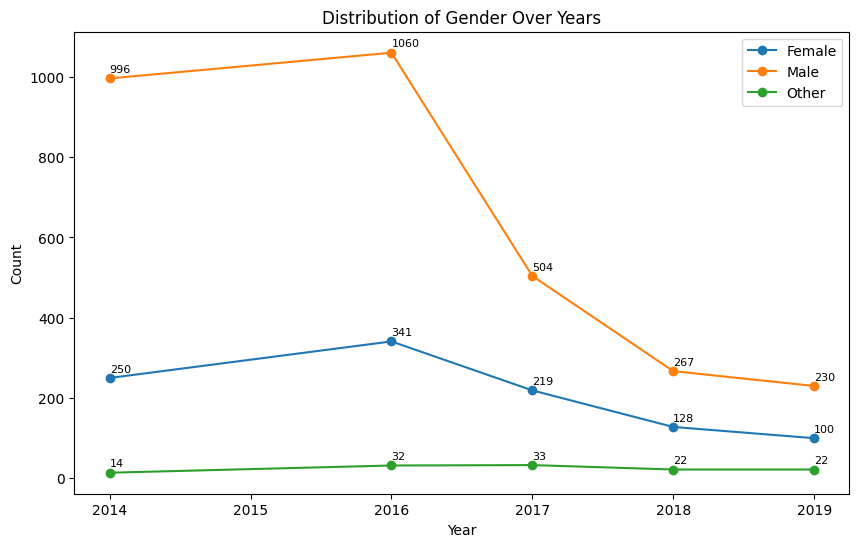

In [21]:
plot_gender_distribution(gender_df)

## Age feature and Age group analysis


As we can see below, there are 4218 users and the ages are presenting results that are not consistent.<br/> By looking at the results we can see a min age as -29 and max as 329. Also, it was possible to see other results like -1, 0, 3, 5, 8 as examples.

There are 4195 records, since I have filetered by ages from 18 to 65. This is dues some ages appeared such as 1, 3, 8, 323, 329, which does not reflect the correct population for this analysis


In [22]:
raw_age_df = main_df[main_df['questionid'] == 1]['answertext'].astype(float)
raw_age_df.describe().round(2)

count    4218.00
mean       33.92
std        10.48
min       -29.00
25%        28.00
50%        33.00
75%        38.00
max       329.00
Name: answertext, dtype: float64

Below, we can see that filtering the ages from 18 to 65, we have 4195 records. We can see the STD has dropped from 10.48 to 7.94, which is a good sign that the data is more consistent and spread out.<br/> With this approach, we are disregarding 23 entries for age, that is not too significant, considering the reliability of the values that were inserted by the respondents.


In [23]:
filt_age_df = main_df[main_df['questionid'] == 1]
filt_age_df = filt_age_df[
    (filt_age_df['answertext'].astype(int) >= 18) &
    (filt_age_df['answertext'].astype(int) <= 65)
]
filt_age_df['answertext'].astype(int).describe().round(2)

count    4195.00
mean       33.80
std         7.94
min        18.00
25%        28.00
50%        33.00
75%        38.00
max        65.00
Name: answertext, dtype: float64

We can see by filtering the ages we are missing 23 records. <br/>This is not a significant number, so we can proceed with the analysis.


The age feature will be grouped as to ease the analysis. The groups will be distributed as:<br/>

- 18 to 30 classified as `Young`<br/>
- 31 to 50 classified as `Adult`<br/>
- Over 50 classified as `Senior`<br/>


### Age dataframe


The age dataframe will have the age already filterered and the age group column added.

In [24]:
# Creating the age dataframe
age_df = create_df_from_questionid(main_df, 1, "age_df")

# Converting 'age' to integer
age_df['answertext'] = age_df['answertext'].astype(int)

# Filter the dataframe
age_df = age_df[(age_df['answertext'] >= 18) & (age_df['answertext'] <= 65)]

# Age groups
age_df['group_age'] = age_df['answertext'].apply(group_ages)

# Rename the 'answertext' column to 'age'
age_df = age_df.rename(columns={'answertext': 'age'})

In [25]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4195 entries, 1 to 4218
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   surveyid    4195 non-null   int64 
 1   questionid  4195 non-null   int64 
 2   age         4195 non-null   int64 
 3   group_age   4195 non-null   object
dtypes: int64(3), object(1)
memory usage: 163.9+ KB


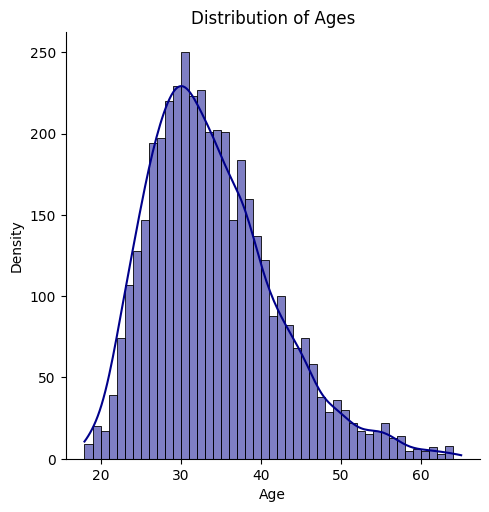

In [26]:
ages = age_df['age'].astype(int)
sns.displot(ages, bins=range(18, 65), kde=True, color='darkblue')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')

plt.show()

In [27]:
mean_age = age_df['age'].mean()
print(f'Mean Age Total: {round(mean_age, 2)}')

median_age = age_df['age'].median()
print(f'Median Age Total: {round(median_age, 2)}')

Mean Age Total: 33.8
Median Age Total: 33.0


The mean and median ages here indicates the average age in the dataset is approximately 33.8 years and the median is 33 years.<br/>
The proximity suggests that the data is symmetrically distributed, with the majority of ages centered around the mean/median. However, the mean being slightly higher than the median could indicate a small amount of right skewness in the data, meaning there might be a few individuals who are significantly older than the rest.


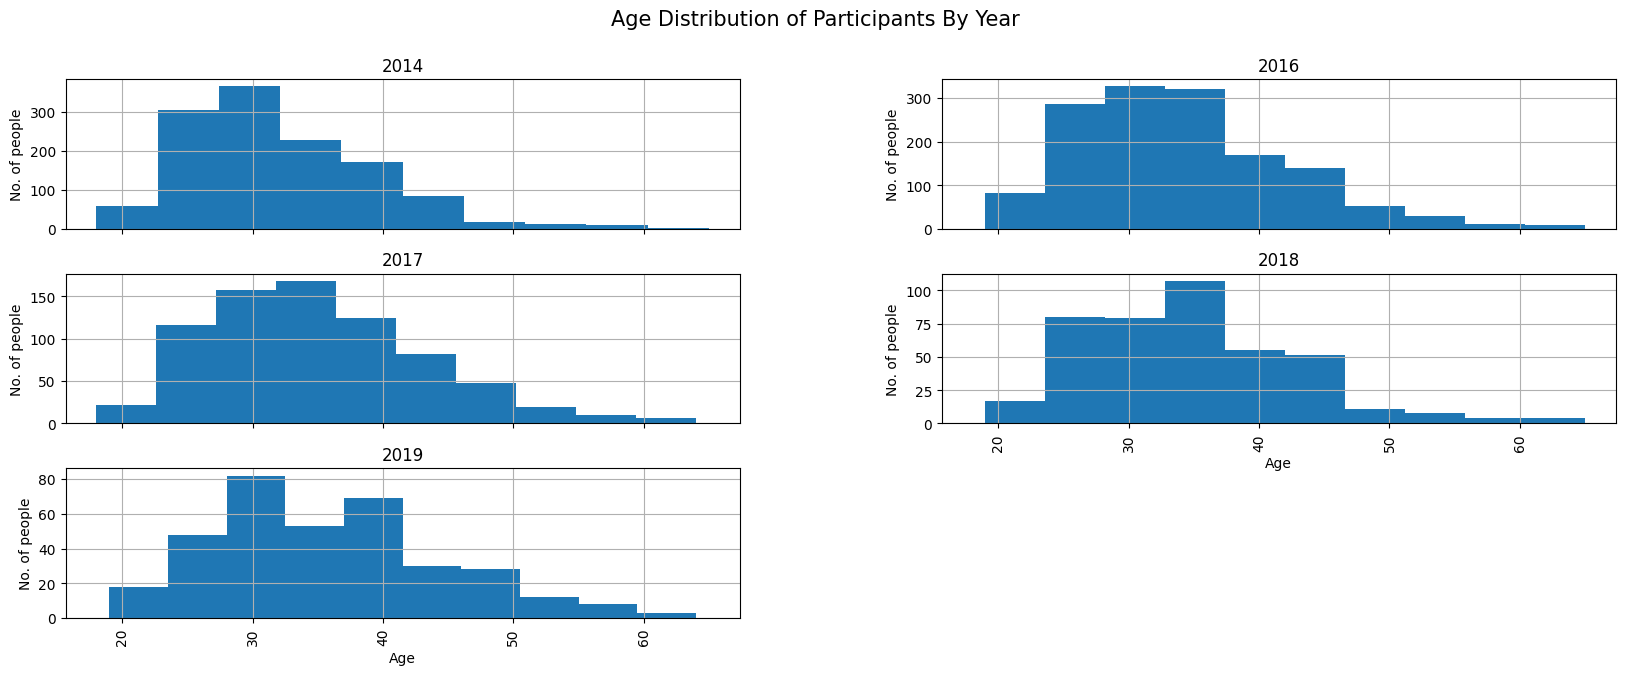

In [28]:
plot_age_distribution(age_df)

In the above graph, we can see the distribution over the years by age.<br/> As previously mentioned the mean and median are 33.8 and 33 years, respectively, and the incidence of this results can be seen in the bar related to 30 years and slightly above 30 years. This is the most common age in the dataset. The distribution is quite similar over the years, with the majority of participants being young adults.


## Age / Gender Group Analysis

We will now analyze the age distribution along with the gender group.<br/>


In [29]:
# Merge the dataframes on the index
age_gender_df = age_df.merge(gender_df, left_index=True,
                             right_index=True,
                             suffixes=('_age', '_gender'))

# Drop the 'surveyid_gender' column
age_gender_df.drop('surveyid_gender', axis=1, inplace=True)

# Rename the 'surveyid_age' column to 'surveyid'
age_gender_df.rename(columns={'surveyid_age': 'surveyid'},
                     inplace=True)

In [30]:
age_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4195 entries, 1 to 4218
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   surveyid           4195 non-null   int64 
 1   questionid_age     4195 non-null   int64 
 2   age                4195 non-null   int64 
 3   group_age          4195 non-null   object
 4   questionid_gender  4195 non-null   int64 
 5   gender             4195 non-null   object
dtypes: int64(4), object(2)
memory usage: 229.4+ KB


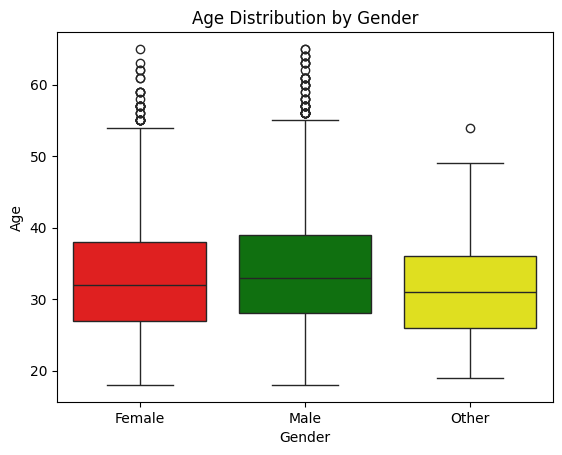

In [31]:
# Boxplot of 'age' grouped by 'gender'
box_plot = sns.boxplot(x='gender',
                       y='age',
                       data=age_gender_df,
                       hue='gender',
                       palette=['red', 'green', 'yellow'])

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

The boxplot above shows the distribution between ages and gender groups. The median does not significantly change for the groups, but we can see the `Males` group being slighlty higher than the other two groups.


## Age Group Distribution by Gender

As we can see, the higher majority of respondents are males, being categorzied as Adults (31 to 50 years old) and Young (18 to 30 years old). The other groups are not well represented in the dataset. Since this is a survey related to Tech Industry, it is expected to have a higher number of young adults and adults, since these are the most common age groups in this industry.


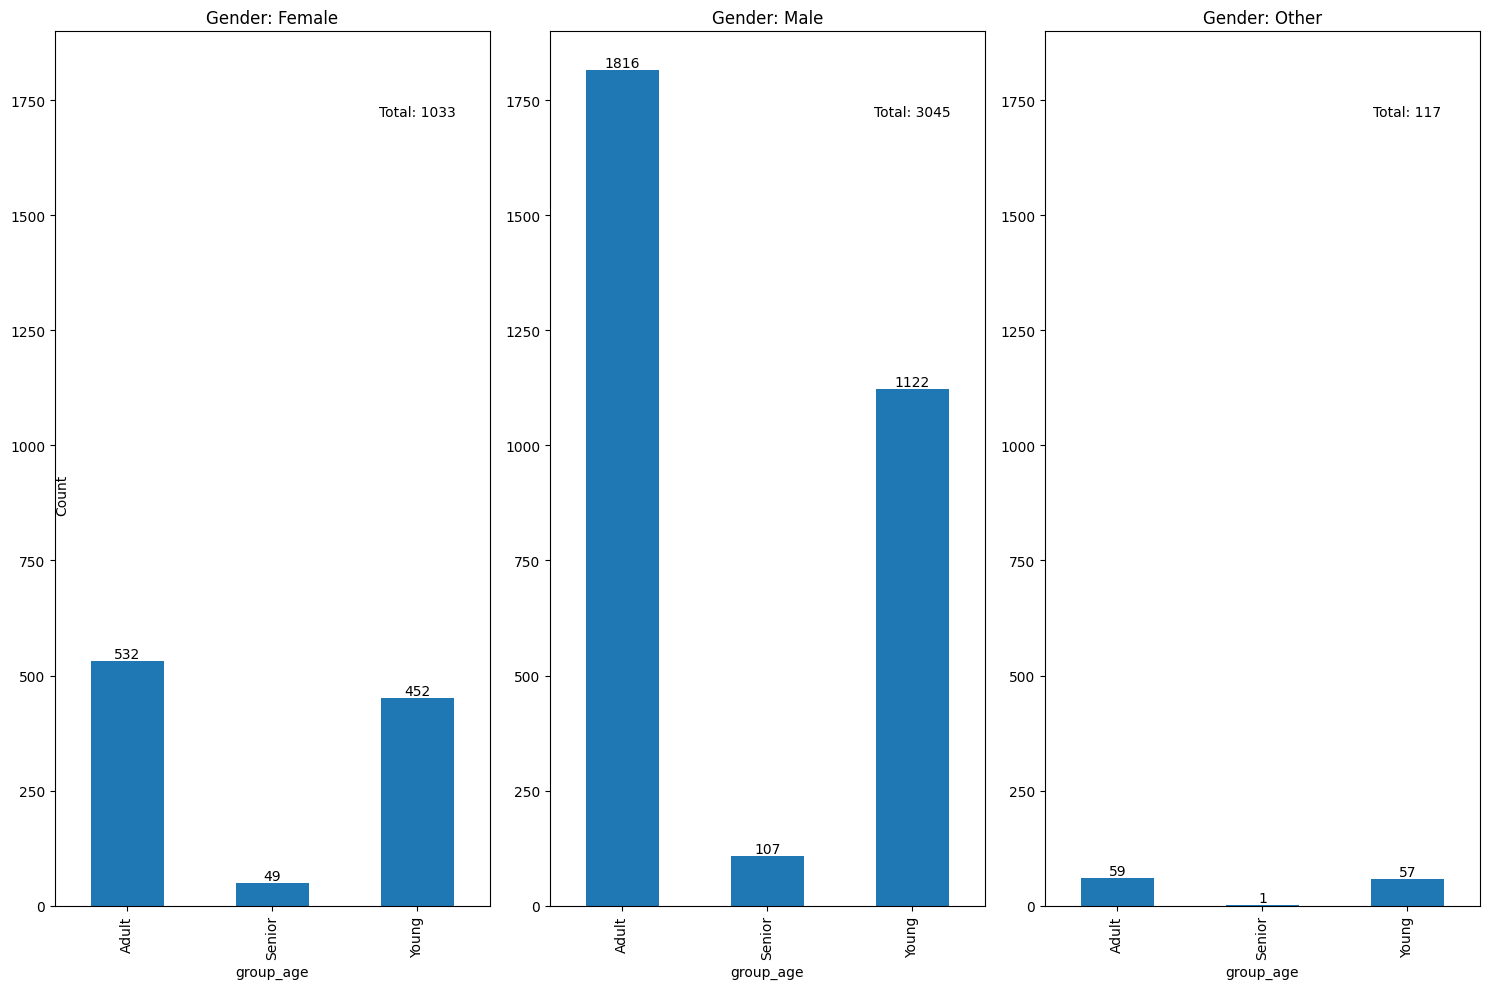

In [32]:
plot_gender_age_distribution(age_gender_df)

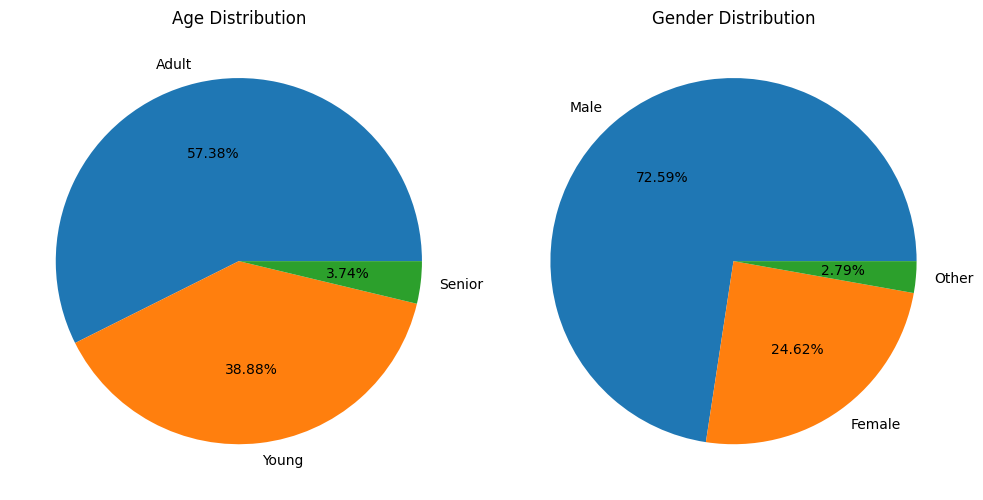

In [33]:
age_percentage = calculate_percentage(age_gender_df, 'group_age')
gender_percentage = calculate_percentage(age_gender_df, 'gender')

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart
axs[0].pie(age_percentage,
           labels=age_percentage.index,
           autopct='%1.2f%%')
axs[0].set_title('Age Distribution')

# Plot the second pie chart
axs[1].pie(gender_percentage,
           labels=gender_percentage.index,
           autopct='%1.2f%%')
axs[1].set_title('Gender Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

We can see above the majority of respondents are Adults (31 to 50 years old) and Young (18 to 30 years old).<br/>
Also we can note that for the `Female` group, the representation is much lower than the `Male` group.<br/> This could indicate some barriers for having `Female` participants in the survey or in the Tech Industry. The same could be said for the `Other` group, which is even lower than the `Female` group.


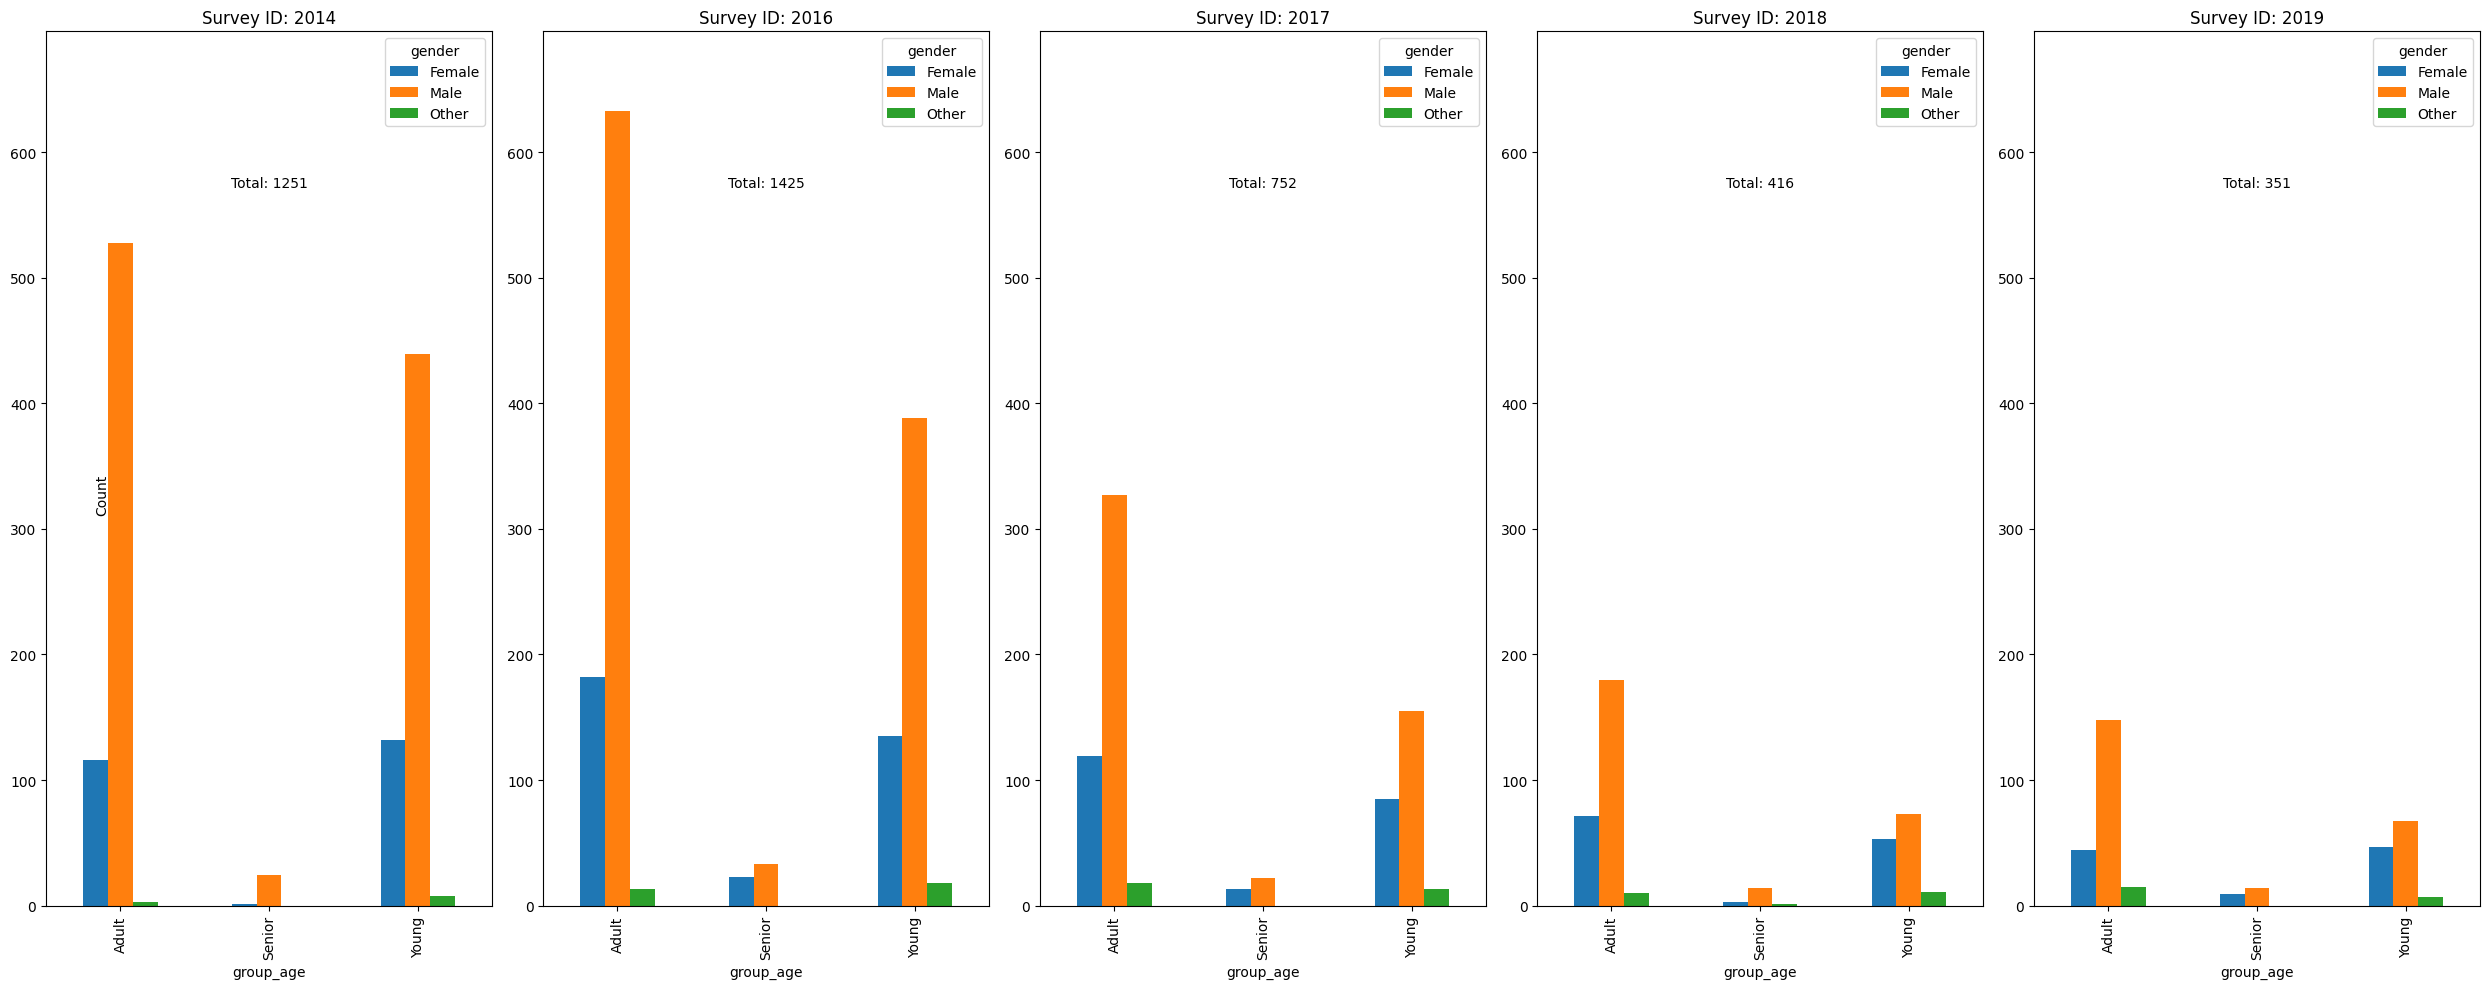

In [34]:
plot_survey_data(age_gender_df)

We can see above, the distribution of the the age groups and gender over the years. The majority of respondents are `Males` and the majority of them are `Adults` (31 to 50 years old).<br/> The `Female` group is the second most common group, with the majority being `Adults` as well.


We can see also the mean and median ages for each group. The `Male` group has the highest mean and median ages, followed by the `Female` group and the `Other` group.<br/> However the numbers are very close to each other, indicating that the distribution is quite similar for the groups.


In [35]:
# Calculate mean age by gender
mean_age_by_gender = age_gender_df.groupby('gender')['age'].mean()
print(f'Mean Age by Gender:\n{mean_age_by_gender.round(2)}\n')

# Calculate median age by gender
median_age_by_gender = age_gender_df.groupby('gender')['age'].median()
print(f'Median Age by Gender:\n{median_age_by_gender.round(2)}')

Mean Age by Gender:
gender
Female    33.37
Male      34.03
Other     31.65
Name: age, dtype: float64

Median Age by Gender:
gender
Female    32.0
Male      33.0
Other     31.0
Name: age, dtype: float64


## Geographical Analysis


In [36]:
# Creating the age dataframe
country_df = create_df_from_questionid(main_df, 3, "countries_df")

# Cleaaning dataset
country_df = country_df.rename(columns={'answertext': 'country'})
country_df.rename(columns={'questionid': 'questionid_country'}, inplace=True)

Since the country dataframe has different values for the same country, like United States and United States of America we need to standardize it as to have a better analysis.


In [37]:
# Replace 'United States' and 'United States of America' with 'USA'
country_df.loc[:, 'country'] = country_df['country'].replace(
    ['United States', 'United States of America'], 'USA')

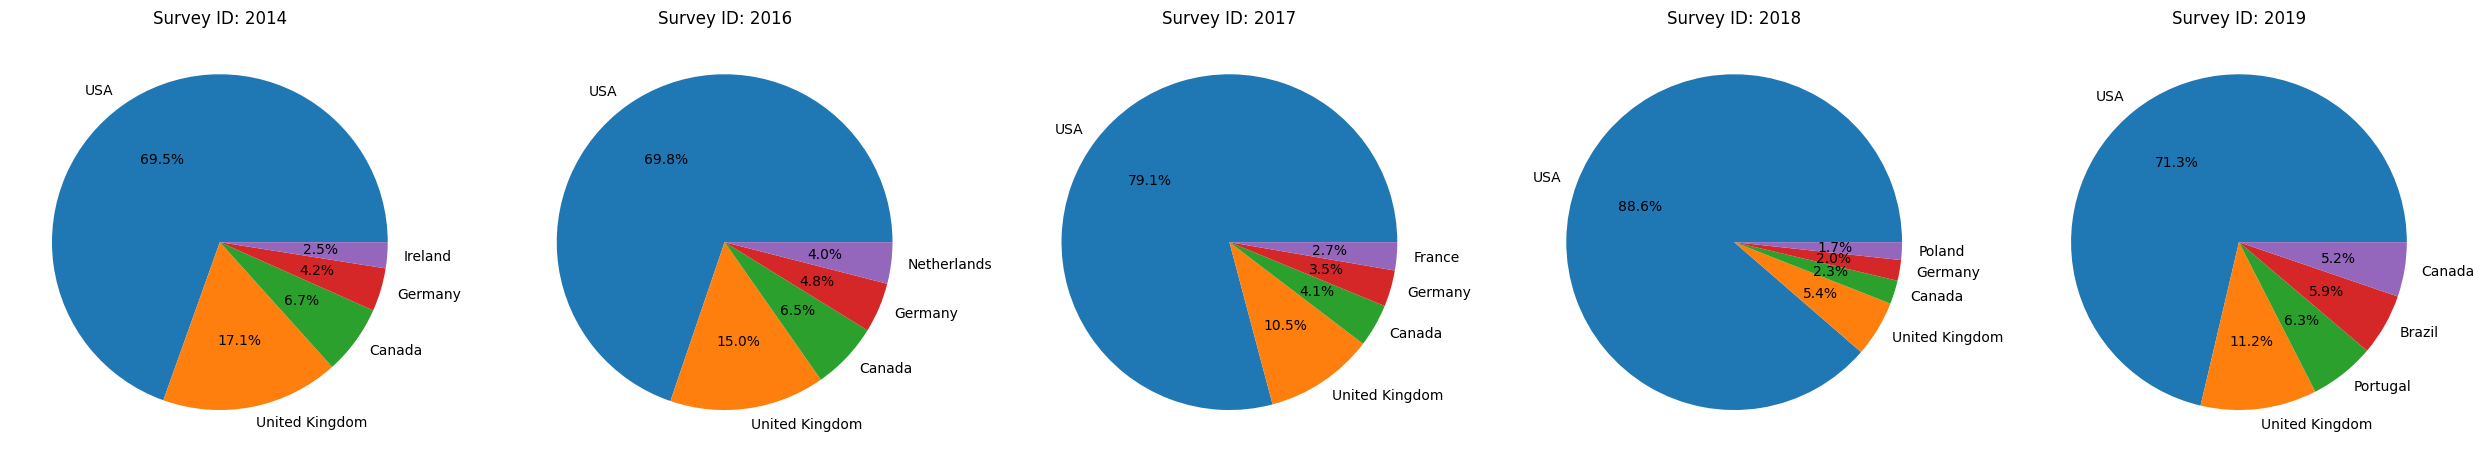

In [38]:
plot_top_countries(country_df)

As seen, the United States is the country with the highest number of respondents, with at least 69.8% and 88.6% of total respondents in each year, followed by the United Kingdom.


Now, some analysis for age and gender will be placed along the countries to see if there is any correlation between these features.


In [39]:
# Merge the dataframes on the index
population_df = age_gender_df.merge(country_df,
                                    left_index=True,
                                    right_index=True,
                                    suffixes=('', '_country'))
# Drop the 'surveyid_gender' column
population_df.drop('surveyid_country', axis=1, inplace=True)

We can see below, the distribution of ages by the top 5 countries with the highest number of respondents, over the years.<br/> It is possible to see that over the years, the age tends to be higher in most of the countries, as USA, United Kindgom, Canada and Netherlands. Also the mean shows an steady growth over the years, reflecting the general trend.<br/> For Germany, however, the line presents ups and downs, tduring the years.<br/>
Also, for Canada, there is a sharp uptrend from 2017 and the same occurs to United Kingdom in 2018.<br/>
In general, this could indicate people getting more aware about to participate in the survey about Mental Health, or the tech industry is getting more diverse over the years.


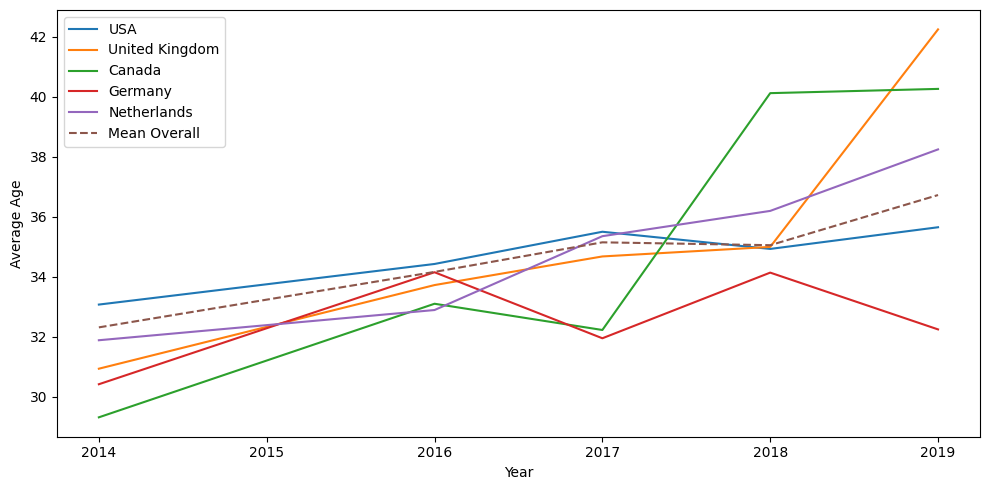

In [40]:
plot_average_age_by_country(population_df)

Below, we can see the distribution of age and gender groups by the top 2 countries with the highest number of respondents, over the years.<br/> In general, the `Male` group is the majority in all countries, followed by the `Female` group. The `Other` group is the least represented in all countries.<br/> The distribution is quite similar for all countries, with the majority of respondents being `Males`.<br/> However there some interesting findings here:<br/>

- In 2016, for the USA `Female` group respondends, were older than all the other groups for these 2 countries.<br/>
- For the United Kingdom, the `Male` group is representing an increase during the years and the `Female` group presents a sharp uptrend in 2018.<br/> The same behavior can be seen for the `Other` group in 2018.<br/>
- For USA, the `Other` group presents a significant increase from 2016.


However, important to see that according to the sample check below, we can see the amount of respondents drops significantly over the years, specially from 2017 onwards.

In [41]:
# Checking the sample size
sample_size = population_df.index.nunique()
print(f"Sample Size: {sample_size}")

# Get sample size by year
sample_size_by_year = population_df.groupby('surveyid').size()
print("-" * 20)
print(f"Sample Size by year: {sample_size_by_year}")

Sample Size: 4195
--------------------
Sample Size by year: surveyid
2014    1251
2016    1425
2017     752
2018     416
2019     351
dtype: int64


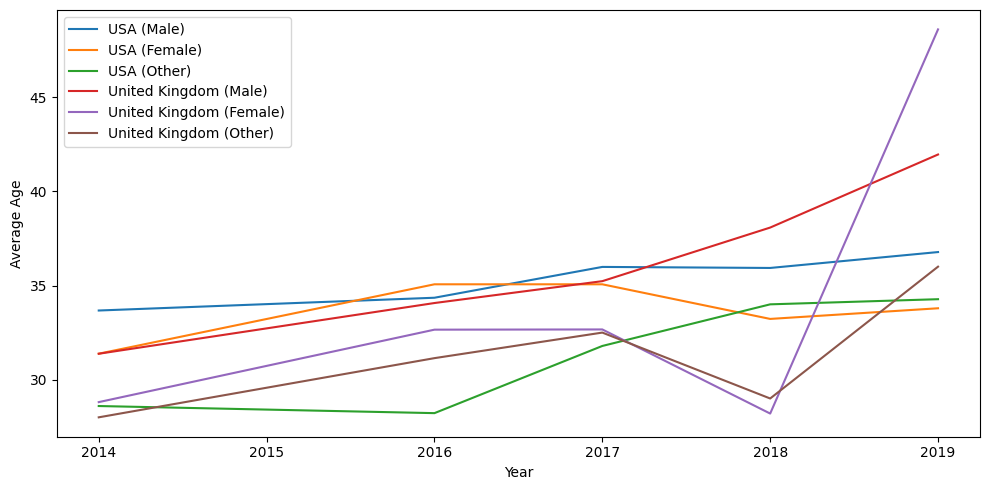

In [42]:
plot_average_age_by_country_gender(population_df)

# Check Most Frequent Questions

Since the `Question` table has 105 unique questions, we can check the ten most frequent questions in the `Answer` table, so then we can get a better approach and analysis of the data in this range of questions.


In [43]:
# Most frequently asked questions
top_10_questions = (main_df.groupby(['questionid', 'questiontext'])
                    .size()
                    .sort_values(ascending=False)
                    .head(10))

top_10_questions = top_10_questions.sort_index(level='questionid')
top_10_questions

questionid  questiontext                                                                                                                                  
1           What is your age?                                                                                                                                 4218
2           What is your gender?                                                                                                                              4218
5           Are you self-employed?                                                                                                                            4218
6           Do you have a family history of mental illness?                                                                                                   4218
7           Have you ever sought treatment for a mental health disorder from a mental health professional?                                                    4218
8           How many employees

## Question id 5 Analysis: Are you self-employed?

In [44]:
# Creating the age dataframe
selfemp_df = create_df_from_questionid(main_df, 5, "selfemp_df")

# Cleaaning dataset
selfemp_df = selfemp_df.rename(columns={'answertext': 'employment'})
selfemp_df.rename(
    columns={'questionid': 'questionid_employment'}, inplace=True)

In [45]:
# Merge the dataframes on the index
employment_df = age_gender_df.merge(selfemp_df,
                                    left_index=True,
                                    right_index=True)

# Drop the 'surveyid_gender' column
employment_df.drop('surveyid_y', axis=1, inplace=True)

# Rename the 'surveyid_age' column to 'surveyid'
employment_df.rename(columns={'surveyid_x': 'surveyid'},
                     inplace=True)

Considering the following:<br/>

- -1 as `Not Employed`,
- 0 as `Employed` and
- 1 as `Self-Employed`<br/>
  We can see, the higher majority of respondents are employed full-time, followed by self-employed and unemployed.


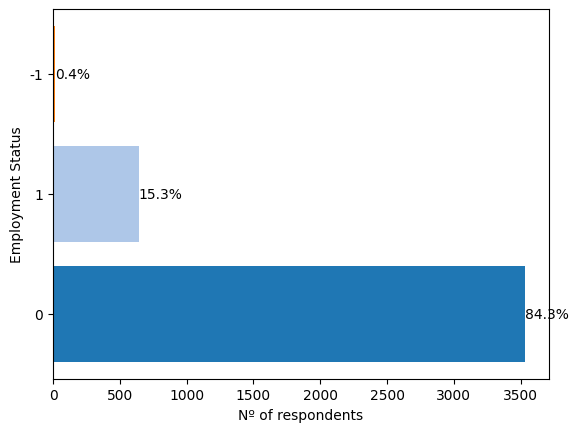

In [46]:
bar_chart(employment_df['employment'].value_counts())

The higher majority of respondents are employed followed by self-employed, and unemployed.<br/>

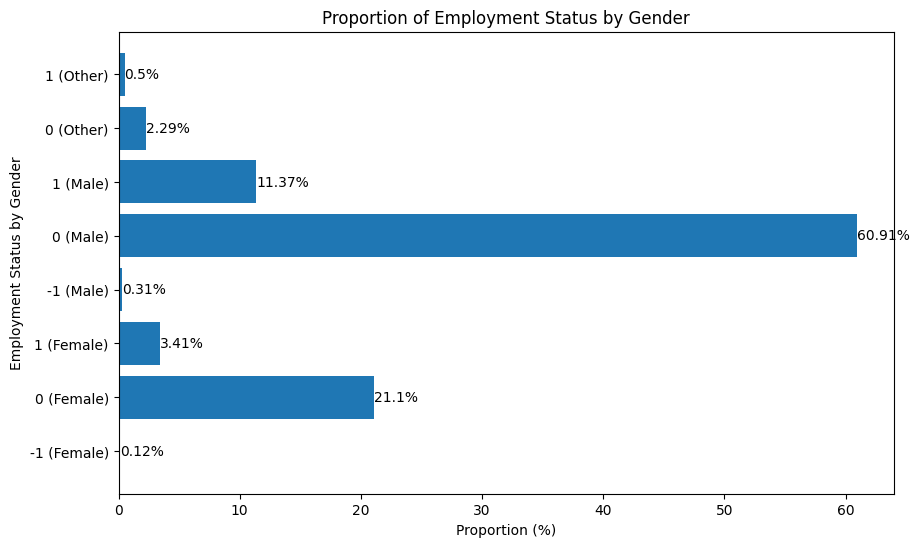

In [47]:
# Group the data by 'gender' and 'employment' and get the count of each group
gender_employment_counts = employment_df.groupby(
    ['gender', 'employment']).size()

# Calculate the proportion of each group
gender_employment_proportions = (
    gender_employment_counts / gender_employment_counts.sum() * 100).round(2)

# Convert the series to a DataFrame and reset the index
df = gender_employment_proportions.reset_index()
df.columns = ['Gender', 'Employment', 'Proportion']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Employment'] + ' (' + df['Gender'] + ')', df['Proportion'])

plt.xlabel('Proportion (%)')
plt.ylabel('Employment Status by Gender')
plt.title('Proportion of Employment Status by Gender')

# Add percentages over the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() /
             2, f'{width}%', ha='left', va='center')

plt.show()

The higher majority of respondents are `Male` being employed and self-employed, followed by `Female` in the same job employment status. They have same behavior, disregarding the proportions of the respondents.<br/>

## Question id 10 Analysis: Does your employer provide mental health benefits as part of healthcare coverage?


In [48]:
# Creating the age dataframe
emphealth_df = create_df_from_questionid(main_df, 10, "emphealth_df")

# Cleaaning dataset
emphealth_df = emphealth_df.rename(columns={'answertext': 'healthcare'})
emphealth_df.rename(
    columns={'questionid': 'questionid_healthcare'}, inplace=True)

In [49]:
# Group the answers in the 'healthcare' column
answers = emphealth_df['healthcare'].value_counts()

# Print the result
print(answers)

healthcare
Yes                               1744
No                                 756
I don't know                       658
-1                                 504
Don't know                         408
Not eligible for coverage / NA     148
Name: count, dtype: int64


Since we have some similar answers like **'I don't know'** and **'Don't know'**, also **-1** and **No** (We will consider -1 as not having health insurance), we will standardize them as to have a better analysis.

In [50]:
# Replace "I don't know" with "Don't know" in the 'healthcare' column
emphealth_df['healthcare'] = emphealth_df['healthcare'].replace(
    "I don't know", "Don't know")
emphealth_df['healthcare'] = emphealth_df['healthcare'].replace(
    "-1", "No")

# Group the answers in the 'healthcare' column
answers = emphealth_df['healthcare'].value_counts()

# Print the result
print(answers)

healthcare
Yes                               1744
No                                1260
Don't know                        1066
Not eligible for coverage / NA     148
Name: count, dtype: int64


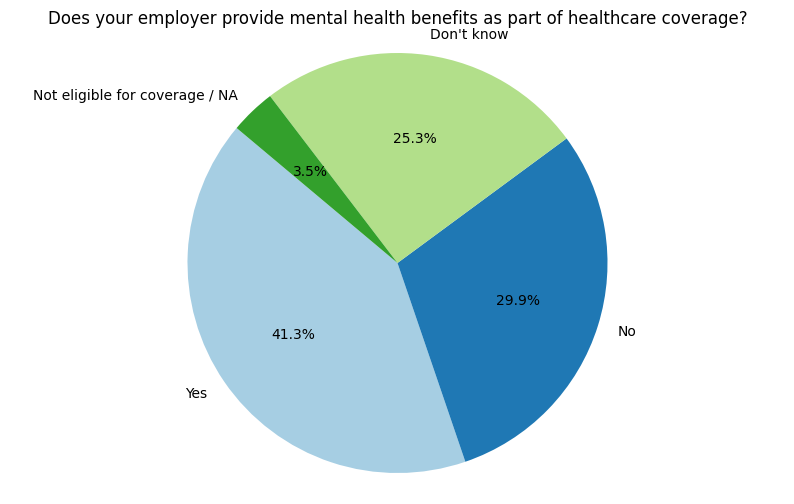

In [51]:
# Count the values in the 'healthcare' column
healthcare_counts = emphealth_df['healthcare'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(healthcare_counts.values,
        labels=healthcare_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired(np.arange(len(healthcare_counts))))
plt.axis('equal')
plt.title(
    'Does your employer provide mental health benefits'
    ' as part of healthcare coverage?'
)
plt.show()

As seen above, the majority of respondents, 41.3%, answered "Yes". This could indicate that a significant portion of the surveyed population has access to healthcare or has a positive response to the healthcare-related question asked.<br/>
29.9% of respondents answered "No". This could suggest that nearly a third of the population surveyed does not have access to healthcare or has a negative response to the healthcare-related question.<br/>
A small portion of respondents, 3.5%, indicated they were "Not eligible for coverage / NA". This could represent a segment of the population that is not eligible for healthcare coverage or the question was not applicable to them.<br/>
Interestingly, a significant 25.3% of respondents answered "Don't know". This could suggest a lack of awareness or uncertainty about their healthcare status or the specific healthcare question asked.


## Question id 7 Analysis: Have you ever sought treatment for a mental health disorder from a mental health professional?

In [52]:
# Creating the age dataframe
treathealth_df = create_df_from_questionid(main_df, 7, "treathealth_df")

# Cleaaning dataset
treathealth_df = treathealth_df.rename(columns={'answertext': 'treatment'})
treathealth_df.rename(
    columns={'questionid': 'questionid_treatment'}, inplace=True)

In [53]:
# Group the answers in the 'healthcare' column
answers = treathealth_df['treatment'].value_counts()

# Print the result
print(answers)

treatment
1    2412
0    1806
Name: count, dtype: int64


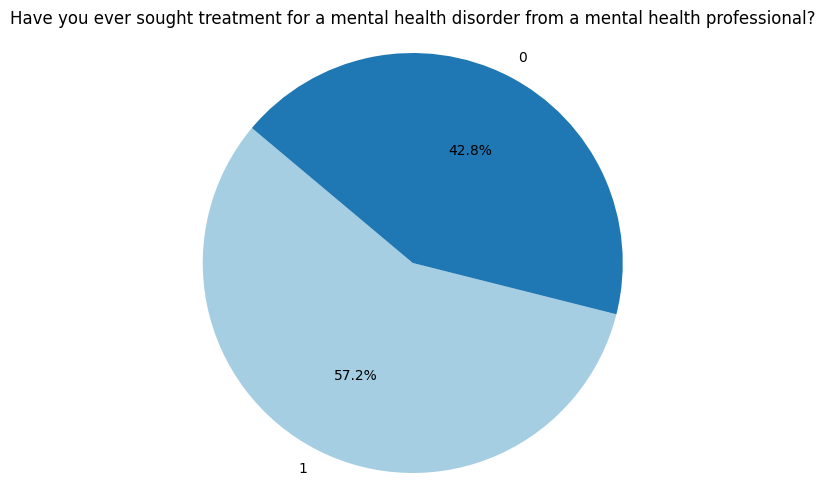

In [54]:
# Count the values in the 'treatment' column
treatment_counts = treathealth_df['treatment'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(treatment_counts.values,
        labels=treatment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired(np.arange(len(treatment_counts))))
plt.axis('equal')
plt.title(
    'Have you ever sought treatment for a mental health disorder '
    'from a mental health professional?'
    )
plt.show()

The pie chart represents responses to the question "Have you ever sought treatment for a mental health disorder from a mental health professional?".

From the data, it can be observed that a majority of the respondents, 57.2%, have sought treatment from a mental health professional. This indicates a high level of engagement with mental health services among the surveyed population.

On the other hand, 42.8% of respondents have not sought treatment. This could be due to a variety of reasons such as lack of awareness, stigma associated with mental health, or lack of access to mental health services, among others.

This can be a good indicator of the importance of continued efforts to promote mental health awareness and accessibility of mental health services.


## Sample Size Analysis

Although we have a sample of 4218 respondents, for the purpose of this analysis we are using a sample of 4195 respondents, since we have filtered the ages from 18 to 65. This is due to some ages that appeared such as 1, 3, 8, 323, 329, which does not reflect the correct population for this analysis.


In [55]:
sample_size = main_df.index.nunique()
print(f"Sample Size: {sample_size}")

# Reset index
main_df_reset = main_df.reset_index()

# Get sample size by year
sample_size_by_year = main_df_reset.groupby('surveyid')['UserID'].nunique()
print("-" * 20)
print(f"Sample Size by year: {sample_size_by_year}")

Sample Size: 4218
--------------------
Sample Size by year: surveyid
2014    1260
2016    1433
2017     756
2018     417
2019     352
Name: UserID, dtype: int64


In [56]:
# Get the sample size
sample_size = employment_df.shape[0]

# Print the sample size
print(f'The sample size is {sample_size}.')

The sample size is 4195.


In [57]:
# Get the count of each gender
gender_counts = employment_df['gender'].value_counts()

# Print the counts
print(gender_counts)

gender
Male      3045
Female    1033
Other      117
Name: count, dtype: int64


# Sampling Analysis for Gender over the top 5 countries respondents


Looking at the gender distribution in the top 5 largest countries in your data, it appears that `Males` are overrepresented in all countries compared to `Females` and `Other`. This could potentially indicate a sampling bias if the actual gender distribution in these countries, for Tech Industry is more balanced.<br/>

However, it's important to note that this doesn't definitively prove the presence of sampling bias. The observed distribution ccan maybe represent that are more `Males` than `Females` and `Other` genders, working in the Tech Industry for these countries. So if this behavior is expected, then the distribution below can be also expected.<br/>

To make a definitive conclusion about the presence of sampling bias, you would need more information about how the data was collected and what population it's supposed to represent. If the data collection process systematically excluded or underrepresented certain genders, then that would be evidence of sampling bias.<br/>

In conclusion, while the data suggests a potential sampling bias towards males, more information is needed to make a definitive conclusion.


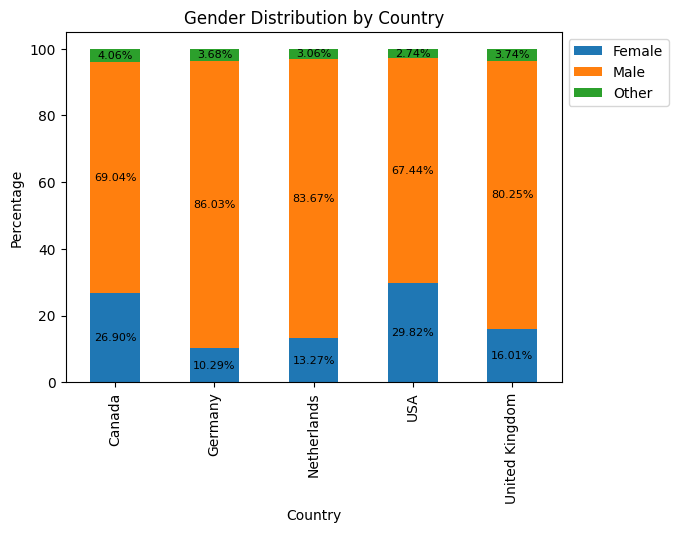

In [58]:
plot_sampling_analysis(population_df)

## Sampling Bias Conclusion

Looking at the gender counts, it appears that there are significantly more `Males` than `Females` or `Others` in this sample.<br/> If the intended population is supposed to have an equal representation of `Males`, `Females` and `Others` , or if it's supposed to reflect the gender distribution in a certain larger population (like a country or a city), then this could be evidence of sampling bias.

However, it's important to note that this doesn't definitively prove the presence of sampling bias. The observed distribution could be representative of the population for the Survey. For example, we are expecting a population that is known to have more males than females and others, like in the Tech Industry, then this distribution could be expected.

To make a definitive conclusion about the presence of sampling bias, we would need more information about how the data was collected and what population it's supposed to represent. If the data collection process systematically excluded or underrepresented certain genders, then that would be evidence of sampling bias.

# Prevalence Rate analysis

As to analyze the prevalence rate, I decided to use the questions below:<br/>

- `questionid = 33 ->  Do you currently have a mental health disorder?`<br/>
- `questionid = 34 ->  Have you ever been diagnosed with a mental health disorder?`<br/>

Prevalence is a measure of disease occurrence. It is calculated as the number of existing cases divided by the total population.<br/>
We can see below, the prevalence rate of the mental health conditions mentioned above, over the years. Each dot represents the prevalence rate for a given year, and the vertical lines (error bars) represent the confidence interval for that rate.<br/>

In [59]:
# Reset the index of population_df
population_df.reset_index(inplace=True)

# Filter main_df to only include rows where questionid equals 33 or 34
filtered_main_df = main_df[main_df['questionid'].isin([33, 34])]

# Drop duplicate 'surveyid' rows from filtered_main_df
filtered_main_df = filtered_main_df.drop_duplicates(
    subset=['surveyid', 'questionid'])

# Merge population_df and filtered_main_df on 'surveyid'
prevalence_df = pd.merge(population_df, filtered_main_df,
                         on='surveyid', how='inner')

# Set 'UserID' as the index again
prevalence_df.set_index('UserID', inplace=True)

# Drop questiontext column
prevalence_df.drop('questiontext', axis=1, inplace=True)

In [60]:
# Filter the data for questionid 33 and print unique 'answertext' values
data_33 = prevalence_df[prevalence_df['questionid'] == 33]
print("Unique answers for question 33:", data_33['answertext'].unique())

# Filter the data for questionid 34 and print unique 'answertext' values
data_34 = prevalence_df[prevalence_df['questionid'] == 34]
print("Unique answers for question 34:", data_34['answertext'].unique())

# Check for NaN values for questionid 33
nan_values_33 = data_33[data_33['questionid'] == 33]['answertext'].isna().sum()
print("Number of NaN values for questionid 33:", nan_values_33)

# Check for NaN values for questionid 34
nan_values_34 = data_34[data_34['questionid'] == 34]['answertext'].isna().sum()
print("Number of NaN values for questionid 34:", nan_values_34)

Unique answers for question 33: ['No' 'Possibly' "Don't Know"]
Unique answers for question 34: ['Yes' '-1']
Number of NaN values for questionid 33: 0
Number of NaN values for questionid 34: 0


Since the answers provided for these questions are categorical, we can calculate the prevalence rate by counting the number of respondents who answered to each question and dividing it by the total number of respondents.<br/> Then I decided to set the confidence interval to 95% and map the corresponding responses as below.

In [61]:
# Define mappings
mapping_33 = {'No': 0, 'Possibly': 1, "Don't Know": 0.5}
mapping_34 = {'Yes': 1, '-1': 0}

# Apply the mappings to 'questionid' 33 and 34 in 'prevalence_df'
mask_33 = prevalence_df['questionid'] == 33
prevalence_df.loc[mask_33, 'map_33'] = prevalence_df.loc[
    mask_33, 'answertext'].map(mapping_33)

mask_34 = prevalence_df['questionid'] == 34
prevalence_df.loc[mask_34, 'map_34'] = prevalence_df.loc[
    mask_34, 'answertext'].map(mapping_34)

# Remove rows where 'map_33' is NaN for 'questionid' 33
mask_33_nan = (
    (prevalence_df['questionid'] == 33) &
    prevalence_df['map_33'].isna()
)
prevalence_df = prevalence_df.drop(prevalence_df[mask_33_nan].index)

# Remove rows where 'map_34' is NaN for 'questionid' 34
mask_34_nan = (
    (prevalence_df['questionid'] == 34) &
    prevalence_df['map_34'].isna()
)
prevalence_df = prevalence_df.drop(prevalence_df[mask_34_nan].index)

As already mentiones, the confidence level for the intervals is 95%, meaning that we are 95% confident that the true prevalence rate lies within the interval.<br/> And below are the interpretaions for the results for the following graphs:<br/>

- **Do you currently have a mental health disorder?**<br/>

  - In 2016, the prevalence rate was 0. This means that there were no reported cases of Mental this issue in the data for that year.<br/>
  - In 2017 and 2018, the prevalence rate was 0.5. This means that half of the reported cases in the data for those years were of realted to this issue.<br/>
  - In 2019, the prevalence rate was back to 0, meaning there were no reported cases ofor this issue in the data for that year.<br/>

- **Have you ever been diagnosed with a mental health disorder?**<br/>
  - In 2016, the prevalence rate was 0.5, meaning that half of the reported cases in the data for that year were related to this issue.<br/>
  - In 2017, 2018, and 2019, the prevalence rate was 0, meaning there were no reported cases for this issue in the data for those years.<br/>

There are no occurrences of these two issues for year 2014.


/Users/ctw01365/Documents/fabiano/courses/turing/fchapu-DS.v2.5.2.1.5/.dsvenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ctw01365/Documents/fabiano/courses/turing/fchapu-DS.v2.5.2.1.5/.dsvenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


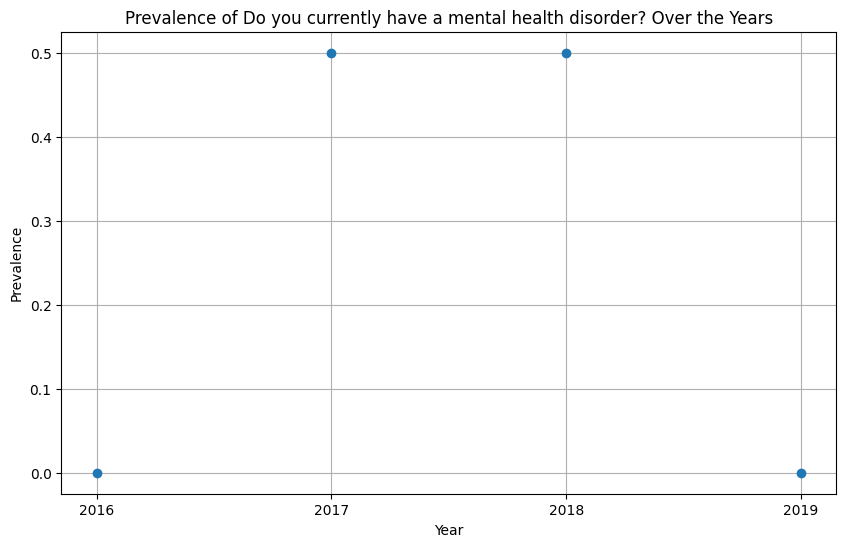

/Users/ctw01365/Documents/fabiano/courses/turing/fchapu-DS.v2.5.2.1.5/.dsvenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ctw01365/Documents/fabiano/courses/turing/fchapu-DS.v2.5.2.1.5/.dsvenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


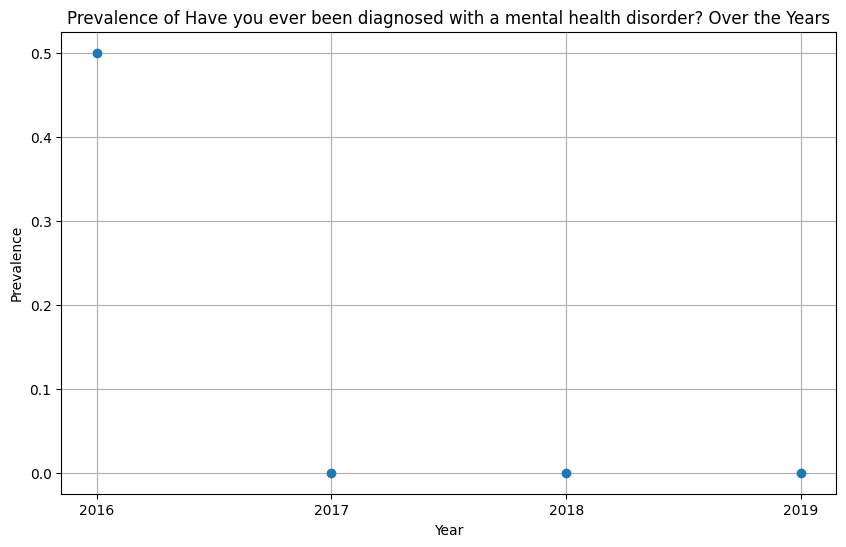

In [62]:
prevalence_33, ci_33 = calculate_prevalence_and_ci(prevalence_df, 'map_33')
prevalence_34, ci_34 = calculate_prevalence_and_ci(prevalence_df, 'map_34')

# Plot for map_33 and map_34
plot_prevalence_and_ci(
    prevalence_33, ci_33,
    'Do you currently have a mental health disorder?')
plot_prevalence_and_ci(
    prevalence_34, ci_34,
    'Have you ever been diagnosed with a mental health disorder?')

In [63]:
# Filter prevalence_df for the year 2014
data_2014 = prevalence_df[prevalence_df['surveyid'] == 2014]

# Check if there are any occurrences of 'map_33' and 'map_34' for the year 2014
map_33_occurrences = data_2014['map_33'].sum()
map_34_occurrences = data_2014['map_34'].sum()

print(f"Occurrences of 'map_33' in 2014: {map_33_occurrences}")
print(f"Occurrences of 'map_34' in 2014: {map_34_occurrences}")

Occurrences of 'map_33' in 2014: 0.0
Occurrences of 'map_34' in 2014: 0.0


In [64]:
# Filter the DataFrame for surveyid = 2014 and questionid = 33 or 34
filtered_df = prevalence_df[(prevalence_df['surveyid'] == 2014) & (
    (prevalence_df['questionid'] == 33) | (prevalence_df['questionid'] == 34))]

# Print the result
print(filtered_df)

Empty DataFrame
Columns: [surveyid, questionid_age, age, group_age, questionid_gender, gender, questionid_country, country, questionid, answertext, map_33, map_34]
Index: []


There are no occurrences of these two issues for year 2014, since these questions were not asked in this year.

In [65]:
prevalence_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5888 entries, 1261 to 4218
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surveyid            5888 non-null   int64  
 1   questionid_age      5888 non-null   int64  
 2   age                 5888 non-null   int64  
 3   group_age           5888 non-null   object 
 4   questionid_gender   5888 non-null   int64  
 5   gender              5888 non-null   object 
 6   questionid_country  5888 non-null   int64  
 7   country             5888 non-null   object 
 8   questionid          5888 non-null   int64  
 9   answertext          5888 non-null   object 
 10  map_33              2944 non-null   float64
 11  map_34              2944 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 598.0+ KB


## Correlation Analysis for the mapped questions
As we can see there are no correlation between the questions `Do you currently have a mental health disorder?` and `Have you ever been diagnosed with a mental health disorder?`<br/> This could indicate that the respondents are not aware of their mental health status or that they have not been diagnosed with a mental health disorder.<br/> 

In [66]:
age_map33 = round(prevalence_df['age'].corr(prevalence_df['map_33']), 2)
age_map33

0.05

In [67]:
age_map34 = round(prevalence_df['age'].corr(prevalence_df['map_34']), 2)
age_map34

-0.06

# Conclusion
The analysis of the dataset reveals several key insights about the mental health of participants in the tech industry over the years.

* Decline in Participation: There is a noticeable decline in the total number of survey participants over time, particularly among males. Although the number of female participants has also decreased slightly since 2016, it follows a similar trend. The number of participants identifying as other genders is very low and remains stable throughout the years.

* Age Distribution: The average age of respondents is around 33.8 years, with a median age of 33 years. This indicates a symmetrically distributed age group, though the slight right skew suggests a few older individuals in the dataset. The majority of respondents are young adults (18-30 years) and adults (31-50 years).

* Gender Representation: Males are significantly overrepresented in the survey data compared to females and those identifying as other genders. This could suggest barriers for female and other gender participants in both the survey and the tech industry. The trend is consistent across the top countries with the highest number of respondents, including the USA, UK, Canada, and others.

* Geographical Insights: The United States has the highest number of respondents each year, followed by the United Kingdom. The age distribution indicates a steady increase in average age over the years in most countries, reflecting either an increased awareness of mental health or greater diversity in the tech industry.

* Healthcare Access: A significant portion of respondents (41.3%) reported having access to healthcare. However, nearly a third (29.9%) indicated they do not have access, and 25.3% were uncertain about their healthcare status. This suggests varying levels of awareness and access to healthcare among participants.

* Mental Health Prevalence: The prevalence rates for current and past mental health disorders show variability, with no reported cases in some years and a 0.5 prevalence rate in others. This inconsistency could indicate underreporting or lack of awareness among respondents about their mental health status.

* Potential Sampling Bias: The overrepresentation of males in the dataset suggests a potential sampling bias. More information about the data collection process and the intended population is needed to confirm this. If the tech industry indeed has a higher proportion of males, then the observed distribution might be expected.

In summary, the data highlights significant trends and disparities in mental health awareness, gender representation, and healthcare access among tech industry professionals. Further investigation and targeted efforts are necessary to address these issues and promote a more inclusive and supportive environment.

# Suggestions About How Your Analysis Can Be Improved
* I feel I could have explored more about correlations between more features. Due to a lack of time and more code expertise, I could not explore all the features in the dataset. I think this could provide more insights into the data and a more in depth analysis.
* I need to dive more in Statistical concepts and techniques to improve the analysis and the insights that can be extracted from the data.